# Data prep

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
import json

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
#Read review data
data = pd.read_csv("reviews.csv")
data["review_id"] = data.index
data.columns = ['producthandle', 'state', 'rating', 'title', 'author', 'email',
       'location', 'body', 'reply', 'createdat', 'repliedat', 'review_id']
data.shape

(393, 12)

# Topic Model

In [4]:
import NewsTrends
import importlib
importlib.reload(NewsTrends)
import locale

%matplotlib inline

In [5]:
t = NewsTrends.topicModel(data,
                          key_idx=list(data.columns).index("review_id"),
                          text_idx=list(data.columns).index("body"),
                          lang="de_core_news_sm",random_state = 1,
                          bigram = True)

Train bigram model ...
ewig fantastisch

definitiv nachkaufen

lieb Duschbrocken

Super frisch Geruch easy begeistern



In [6]:
corpus = t.tokenize_docs(rmv_tokens=["duschbrocken"])

392 done ]


In [7]:
corpus.head()

,review_id,tokenized_text
0,0,"[riechen, unfassbar, ewig, fantastisch, defini..."
1,1,[lieb]
2,2,"[super, frisch, geruch, easy, begeistern]"
3,3,"[carlos, ausgiebig, haus, urlaub, testen, rein..."
4,4,"[verschieden, hinsicht, anspruchsvoll, kosmeti..."


In [8]:
corpus = t.get_bow(below = 0.05,above = 0.9)

INFO:lda:n_documents: 393
INFO:lda:vocab_size: 76
INFO:lda:n_words: 3895
INFO:lda:n_topics: 1
INFO:lda:n_iter: 800
INFO:lda:<0> log likelihood: -16573
INFO:lda:<10> log likelihood: -16573
INFO:lda:<20> log likelihood: -16573
INFO:lda:<30> log likelihood: -16573
INFO:lda:<40> log likelihood: -16573
INFO:lda:<50> log likelihood: -16573
INFO:lda:<60> log likelihood: -16573
INFO:lda:<70> log likelihood: -16573
INFO:lda:<80> log likelihood: -16573
INFO:lda:<90> log likelihood: -16573
INFO:lda:<100> log likelihood: -16573
INFO:lda:<110> log likelihood: -16573
INFO:lda:<120> log likelihood: -16573
INFO:lda:<130> log likelihood: -16573
INFO:lda:<140> log likelihood: -16573
INFO:lda:<150> log likelihood: -16573
INFO:lda:<160> log likelihood: -16573
INFO:lda:<170> log likelihood: -16573
INFO:lda:<180> log likelihood: -16573
INFO:lda:<190> log likelihood: -16573
INFO:lda:<200> log likelihood: -16573
INFO:lda:<210> log likelihood: -16573
INFO:lda:<220> log likelihood: -16573
INFO:lda:<230> log lik

INFO:lda:<420> log likelihood: -17803
INFO:lda:<430> log likelihood: -17750
INFO:lda:<440> log likelihood: -17826
INFO:lda:<450> log likelihood: -17784
INFO:lda:<460> log likelihood: -17842
INFO:lda:<470> log likelihood: -17837
INFO:lda:<480> log likelihood: -17763
INFO:lda:<490> log likelihood: -17847
INFO:lda:<500> log likelihood: -17898
INFO:lda:<510> log likelihood: -17868
INFO:lda:<520> log likelihood: -17777
INFO:lda:<530> log likelihood: -17783
INFO:lda:<540> log likelihood: -17697
INFO:lda:<550> log likelihood: -17758
INFO:lda:<560> log likelihood: -17777
INFO:lda:<570> log likelihood: -17710
INFO:lda:<580> log likelihood: -17684
INFO:lda:<590> log likelihood: -17751
INFO:lda:<600> log likelihood: -17738
INFO:lda:<610> log likelihood: -17680
INFO:lda:<620> log likelihood: -17705
INFO:lda:<630> log likelihood: -17692
INFO:lda:<640> log likelihood: -17793
INFO:lda:<650> log likelihood: -17789
INFO:lda:<660> log likelihood: -17781
INFO:lda:<670> log likelihood: -17767
INFO:lda:<68

INFO:lda:<20> log likelihood: -19992
INFO:lda:<30> log likelihood: -19786
INFO:lda:<40> log likelihood: -19572
INFO:lda:<50> log likelihood: -19555
INFO:lda:<60> log likelihood: -19431
INFO:lda:<70> log likelihood: -19483
INFO:lda:<80> log likelihood: -19408
INFO:lda:<90> log likelihood: -19420
INFO:lda:<100> log likelihood: -19444
INFO:lda:<110> log likelihood: -19312
INFO:lda:<120> log likelihood: -19324
INFO:lda:<130> log likelihood: -19407
INFO:lda:<140> log likelihood: -19265
INFO:lda:<150> log likelihood: -19226
INFO:lda:<160> log likelihood: -19375
INFO:lda:<170> log likelihood: -19280
INFO:lda:<180> log likelihood: -19390
INFO:lda:<190> log likelihood: -19280
INFO:lda:<200> log likelihood: -19343
INFO:lda:<210> log likelihood: -19283
INFO:lda:<220> log likelihood: -19227
INFO:lda:<230> log likelihood: -19196
INFO:lda:<240> log likelihood: -19182
INFO:lda:<250> log likelihood: -19116
INFO:lda:<260> log likelihood: -19168
INFO:lda:<270> log likelihood: -19105
INFO:lda:<280> log l

INFO:lda:<480> log likelihood: -19058
INFO:lda:<490> log likelihood: -19047
INFO:lda:<500> log likelihood: -18964
INFO:lda:<510> log likelihood: -19062
INFO:lda:<520> log likelihood: -19064
INFO:lda:<530> log likelihood: -19028
INFO:lda:<540> log likelihood: -18970
INFO:lda:<550> log likelihood: -18981
INFO:lda:<560> log likelihood: -18996
INFO:lda:<570> log likelihood: -18991
INFO:lda:<580> log likelihood: -19025
INFO:lda:<590> log likelihood: -19088
INFO:lda:<600> log likelihood: -19072
INFO:lda:<610> log likelihood: -18978
INFO:lda:<620> log likelihood: -19054
INFO:lda:<630> log likelihood: -19025
INFO:lda:<640> log likelihood: -19106
INFO:lda:<650> log likelihood: -18958
INFO:lda:<660> log likelihood: -18931
INFO:lda:<670> log likelihood: -19018
INFO:lda:<680> log likelihood: -18987
INFO:lda:<690> log likelihood: -18921
INFO:lda:<700> log likelihood: -18885
INFO:lda:<710> log likelihood: -18905
INFO:lda:<720> log likelihood: -18981
INFO:lda:<730> log likelihood: -18887
INFO:lda:<74

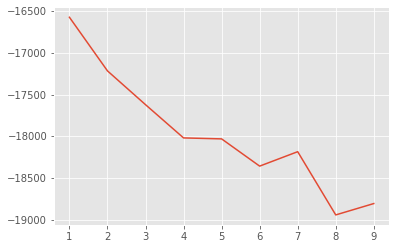

In [9]:
k,results = t.LDA_tune_k(max_k=10,alpha=0.01,eta=0.001,iterations=800)

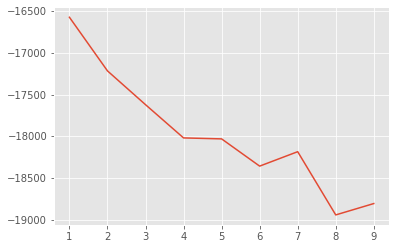

In [10]:
plt.plot(k,results)

In [13]:
#Train topic model
LDA = t.fit_LDA(6,alpha=0.01,eta=0.001,iterations=1500)

INFO:lda:n_documents: 393
INFO:lda:vocab_size: 76
INFO:lda:n_words: 3895
INFO:lda:n_topics: 6
INFO:lda:n_iter: 1500
INFO:lda:<0> log likelihood: -32675
INFO:lda:<10> log likelihood: -20314
INFO:lda:<20> log likelihood: -19992
INFO:lda:<30> log likelihood: -19786
INFO:lda:<40> log likelihood: -19572
INFO:lda:<50> log likelihood: -19555
INFO:lda:<60> log likelihood: -19431
INFO:lda:<70> log likelihood: -19483
INFO:lda:<80> log likelihood: -19408
INFO:lda:<90> log likelihood: -19420
INFO:lda:<100> log likelihood: -19444
INFO:lda:<110> log likelihood: -19312
INFO:lda:<120> log likelihood: -19324
INFO:lda:<130> log likelihood: -19407
INFO:lda:<140> log likelihood: -19265
INFO:lda:<150> log likelihood: -19226
INFO:lda:<160> log likelihood: -19375
INFO:lda:<170> log likelihood: -19280
INFO:lda:<180> log likelihood: -19390
INFO:lda:<190> log likelihood: -19280
INFO:lda:<200> log likelihood: -19343
INFO:lda:<210> log likelihood: -19283
INFO:lda:<220> log likelihood: -19227
INFO:lda:<230> log li

In [15]:
#Inspect topic results
topics = t.inspect_topics(n_top_words=10)

res = ''
for i, topic_words in enumerate(topics):
    res += '* **Topic {}:** {}\n'.format(i+1, ' '.join(topic_words))
NewsTrends.MD(res)

'* **Topic 1:** super duft haar begeistern tollen haut produkt verpackung dusche\n* **Topic 2:** dose klasse schwer kaufen lieb mal brocken carlos duften\n* **Topic 3:** super fall haut kaufen shampoos sorte spannen zufrieden ausprobieren\n* **Topic 4:** bestellung fairpackung seife schwer bestellen sorte empfehlen spannen zufrieden\n* **Topic 5:** haar waschen produkt shampoo seife zufrieden toll bestellung dusche\n* **Topic 6:** haar super carlos produkt riechen frida haut geruch duft\n'

In [16]:
topics = [["Produktbegeisterung"],
          ["Dose"],
          ["Haut"],
          ["Bestellung"],
          ["Haar und Shampoo"],
          ["Geruch"]]
len(topics)

6

In [80]:
doctopics = t.get_doc_topic(topics)
graph = t.generate_network(node_attr=["topic",'body',"rating","author"],
                  node_label="title", similarity_cutoff = 0.9999,
                 similarity_measure = "cosine_similarity")

In [24]:
import networkx as nx

graph.remove_nodes_from(list(nx.isolates(graph)))
nx.write_gml(graph, 'docs.gml')

# Duschbrocken review exploration

# Data summary

In [20]:
analysiscode="duschbrocken"

In [43]:
import pprint
print("Das Datenset enthält {} Reviews von {} Usern.".format(t.df.shape[0],t.df["author"].nunique()))
print()
print("The top reviewers in the data set are:")
print()
for a, b in enumerate(t.df.groupby("email")["review_id"].agg("count").sort_values(ascending=False)[0:5].iteritems(), 1):
    print('{}..., Anzahl: {}'.format(b[0][0:10],b[1]))
    
print()

Das Datenset enthält 393 Reviews von 306 Usern.

The top reviewers in the data set are:

maxiillner..., Anzahl: 4
info@gabys..., Anzahl: 3
Jeany1990@..., Anzahl: 3
schaefer.6..., Anzahl: 3
andreea.gi..., Anzahl: 2



# Document Analysis

*Note: If the following plots are not displayed nicely or missing the legend on the right-hand side, hit refresh and wait until fully loaded.*

### Die Produktreviews des Duschbrocken sind relativ homogen und der Großteil behandelt den guten Duft und die tolle Produkterfahrung ([How to read the network](http://nbviewer.jupyter.org/github/bockjo/Udacity_portfolio/blob/master/networks_how_to.png)).

In [74]:
import os
from shutil import copyfile

# Move templates
source = "01_Vorlage/"
dst = "graphics5/network/"

for f in ["index.html","css/style.css","js/main.js","js/sigma/sigma.parseJson.js"]:
    copyfile(source+f, dst+f)


In [75]:
from IPython.display import IFrame
IFrame("graphics5/network/index.html", width="100%", height=650)

### Die Produktratings sind grundsätzlich sehr positiv. Vereinzelt gibt es beim Thema Geruch schlechte Noten, weil es zu intensiv riecht.

In [73]:
from IPython.display import IFrame
IFrame("graphics4/network/index.html", width="100%", height=650)

# Plotting code

In [47]:
import plotly.io as pio
import warnings
pio.templates.default = 'simple_white'
warnings.filterwarnings('ignore')

In [48]:
#Plotly
import numpy as np
import plotly
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
from ipywidgets import widgets
from chart_studio.widgets import GraphWidget

init_notebook_mode(connected=True)

# generate a function to handle changes in the widget
# add top_n functionality!!!
def timeline(t,y,date_col,colorby,aggregate="nunique",timeinterval=None):

    plot_dat = t.copy()
    plot_dat[date_col] = pd.to_datetime(plot_dat[date_col]).dt.week
        
    plot_dat = plot_dat.groupby([date_col,colorby])[y].agg(aggregate)
    dat = plot_dat.reset_index()
    
    dataset = []
    for gr in dat[colorby].unique():
        dataset.append(go.Bar(
        x=dat[dat[colorby]==gr][date_col],
        y=dat[dat[colorby]==gr][y],
        name=gr
    ))

    layout = go.Layout(
        autosize=True,
        barmode='stack',
        showlegend = True,
        legend=dict(orientation="h",x=0.1,y=1.5),
        yaxis = dict(title = "Publish-Count"),
        xaxis = dict(title="Week number")
    )
    
    
    fig = go.Figure(data=dataset, layout=layout)
    return iplot(fig, filename=analysiscode+'stacked-bar')

# generate a function to handle changes in the widget
def hist(t,x,colorby="topic_terms",logx = False):

    plot_dat = t.copy()
    
    if logx:
        plot_dat[x]=np.log(plot_dat[x])
        #typ = 'log'
    #else:
        #typ="normal"
    data = []
    for gr in plot_dat[colorby].unique():
        data.append(go.Histogram(
            x=plot_dat.loc[plot_dat[colorby]==gr,x],
            name=gr
            
    ))

    layout = go.Layout(barmode='stack',legend=dict(orientation="h",x=0.1,y=1.5),
                       autosize=True,
                #width=800,
                #height=550,
                       xaxis=dict(title=x,type="normal",autorange=True,
                                 exponentformat= "e" if logx else "none"),
                      yaxis = dict(title="count"))
    fig = go.Figure(data=data, layout=layout)

    
    return iplot(fig, filename=analysiscode+'stacked histogram')

# add top_n functionality!!!
def scatter(t,x,y,groupby,colorby = None,sizeby = "fixed", aggregate = {"x":"sum","y":"sum","colorby":"sum"},
            axistype = {"x":"linear","y":"linear"},
            xtitle="", ytitle=""):
    
    plot_dat = t.copy()
    if sizeby=="fixed":
        s=15
    if colorby == None:
        colorby = groupby
        
    if plot_dat[colorby].dtype == np.object:
        plot_datx = plot_dat.groupby([colorby,groupby])[x].agg(aggregate["x"])
        plot_daty = plot_dat.groupby([colorby,groupby])[y].agg(aggregate["y"])
        
        dat = []
        for cat in plot_dat[colorby].unique():
            
            dat.append({"x":plot_datx[cat].values,
                       "y":plot_daty[cat].values,
                        "text":plot_daty[cat].index,
                       "name":cat,
                       "mode":"markers",
                       "marker":dict(size=s)})
        fig = {
            'data': dat,
            'layout': {"legend":dict(orientation="h",x=0.1,y=1.5),"showlegend": True,
                'xaxis': {'title': xtitle,"type":axistype["x"],"exponentformat": "e" if axistype["x"]=="log" else "none"},
                'yaxis': {'title': ytitle,"type":axistype["y"],"exponentformat": "e" if axistype["y"]=="log" else "none"},
                "autosize":True
            }
        }
    else:
        plot_datx = plot_dat.groupby(groupby)[x].agg(aggregate["x"])
        plot_daty = plot_dat.groupby(groupby)[y].agg(aggregate["y"])
        plot_datcol = plot_dat.groupby(groupby)[colorby].agg(aggregate["colorby"])
        
        trace1 = go.Scatter(
            y = plot_daty.values,
            x = plot_datx.values,
            mode='markers',
            marker=dict(
                size=s,
                color = plot_datcol.values, #set color equal to a variable
                colorscale='Viridis',
                showscale=True
            )
        )
        layout = dict(xaxis=dic(title=xtitle,type=axistype["x"],exponentformat= "e" if axistype["x"]=="log" else "none"),
                      yaxis=dic(title=ytitle,type=axistype["y"],exponentformat= "e" if axistype["y"]=="log" else "none"))
        fig = go.Figure(data=[trace1],layout = layout)
        
    return iplot(fig, filename=analysiscode+'bar')

# add top_n functionality!!!
def bar_continuous(t):
    plot_dat = t.copy()
    
    plot_dat = plot_dat.groupby(groupby)[x].agg(aggregate)
    data =[
        go.Bar(
        y=plot_dat.index.values,
        x=plot_dat.values,
        orientation = 'h')
    ]
    fig = go.Figure(data=data)
    
    return iplot(fig, filename='bar_cont')
        
def bar(t,x,groupby,xtitle="",colorby = "topic_terms", aggregate = "sum"):
    plot_dat = t.copy()
    
    data = []
    plot_dat = plot_dat.groupby([colorby,groupby])[x].agg(aggregate)
    for gr in plot_dat.index.levels[0]: 
        data.append(go.Bar(
        y=plot_dat[gr].index.values,
        x=plot_dat[gr].values,
        name=gr,
        orientation = 'h'
    ))

    layout = go.Layout(
        autosize=False,
    width=1000,
    height=550,
        barmode='stack',
        showlegend = True,
        xaxis = dict(title=xtitle),#,position=-1.
        yaxis = dict(),
        legend=dict(orientation="v",x=1,y=1.2),
        margin = go.Margin(l=350,r=10)
    )

    fig = go.Figure(data=data, layout=layout)
    
    return iplot(fig, filename=analysiscode+'bar_cat')

<IPython.core.display.Javascript object>

# Exploratory analysis

### Der Geruch und die Begeisterung für das Produkt generiert am meisten positive Reviews. Der Bestellprozess hingegen generiert schlechtere Bewertungen aber auch geringere Aufmerksamkeit.

In [55]:
scatter(t.df,x="rating",y="review_id",groupby="topic",colorby = "topic",sizeby = "fixed", aggregate = {"x":"mean","y":"count",
                                                                                                       "colorby":"sum"},
            axistype = {"x":"linear","y":"linear"},
            xtitle="Rating", ytitle="Anzahl Reviews")

### Ab Kalenderwoche 17 sind die Reviews deutlich angestiegen und das Thema mit der Dose und das Haarverhalten hat begonnen Aufmerksamkeit zu erregen.

In [57]:
timeline(t.df,y="review_id",date_col="createdat",colorby="topic",aggregate="nunique",timeinterval=None)